# 📊 Stock Market Sentiment Analyzer

**Goal:** Use NLP to analyze stock market sentiment from News and Twitter and compare it with stock price trends. 

## **Project Overview**
This project aims to analyze sentiment in stock market-related tweets using Natural Language Processing (NLP). By leveraging **Hugging Face's FinBERT model**, we classify tweets as **positive, negative, or neutral** and explore how sentiment correlates with stock market trends. 

### ***Key Components***
- Data Collection (Twitter & News)
- Sentiment Analysis (Hugging Face models)
- Text Cleaning & Preprocessing
- Visualization & Interpretation
- Comparison with Stock Price Trends 

## Important Necessary Libraries

In [6]:
# Important Necessary Libraries
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf 
import re

# NLP & Sentiment Analysis 
from datasets import load_dataset
from transformers import pipeline


ModuleNotFoundError: No module named 'matplotlib'

## Load Dataset

In [ ]:
# Load datasets from Hugging Face
dataset = load_dataset ("StephanAkkerman/stock-market-tweets-data")

# Get the number of tweets in the dataset
num_tweets = len(dataset['train'])
num_tweets

NameError: name 'load_dataset' is not defined

In [ ]:
# Display first few entries 
print(dataset['train'][:5])

NameError: name 'dataset' is not defined

In [ ]:
sample_size = 5000
sampled_tweets = random.sample(list(dataset['train']), sample_size)

df_tweets = pd.DataFrame(sampled_tweets)

# Display first few raws
print(df_tweets.head())

       id                 created_at  \
0  593725  2020-06-20 16:31:32+00:00   
1  631451  2020-06-23 08:13:45+00:00   
2  289208  2020-05-05 01:15:12+00:00   
3  908741  2020-07-15 21:16:10+00:00   
4  436965  2020-06-06 12:55:58+00:00   

                                                text  
0  RT @SeekingAlpha: MacroView: Retail Sales Boun...  
1  $FB - Facebook: Short-Term Pain, But Long-Term...  
2  RT @WallStSai: NEW ZEALAND RECORDS NO NEW CASE...  
3  RT @Street_Insider: Amazon CEO Jeff Bezos' Twi...  
4  RT @ISABELNET_SA: 📌Markets\n\nAccording to Bof...  


## **Text Cleaning and Preprocessing**
Before analysis sentiment, we need to clean the text to:
1. Remove URLs, mentions, and special characters. 
2. Standardize formatting for better NLP performance.

In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URL
    text = re.sub(r'@\w+', '', text)    # Remove mentions @user 
    text = re.sub(r'#\w+','', text)     # Remove hashtags
    text = re.sub(r'#[A-Za-z0-9] +', ' ', text) # Remove special characters 
    text = re.sub(r'[^\w\s$]','', text) # Keep words, numbers, and "$" (for stocks)
    return text.strip()

# Test on first tweet
sample_text = dataset['train'][0]['text']
print("Original:", sample_text)
print("Cleaned:", clean_text(sample_text))

Original: @KennyDegu very very little volume. With $10T you'd think they could have $SPX  trading at 10,000 by now.
Cleaned: very very little volume With $10T youd think they could have $SPX  trading at 10000 by now


## **Sentiment Analysis using FinBERT**
We use a pre-trained **FinBERT** modelfrom Hugging Face to classify tweets as:
- Positive
- Neutral
- Negative

In [ ]:
# Load FinBERT model
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

# Test on a sample tweet
test_tweet = clean_text(dataset['train'][0]['text'])
result = sentiment_pipeline(test_tweet)

print(f"Tweet: {test_tweet}\nSentiment {result[0]['label']} (confidence: {result[0]['score']:.2f})")

Device set to use mps:0


Tweet: very very little volume With $10T youd think they could have $SPX  trading at 10000 by now
Sentiment neutral (confidence: 0.70)


### **Batch Sentiment Analysis**
We analyze the sentiment of a **large dataset** (20,000 tweets) to identify trends

In [ ]:
num_tweets = 20000
batch_size = 1000

# Convert dataset to DataFrame (first 20,000 tweets)
df_tweets = pd.DataFrame(dataset['train'][:20000])

df_tweets['cleaned_text'] = df_tweets['text'].apply(clean_text)

# Initialize empty list to store sentiment 
sentiments = []

# Process tweets in batch 
batch_size = 1000 
for i in range (0, 20000, batch_size):
    batch_texts = df_tweets['cleaned_text'][i:i + batch_size].to_list()
    batch_results = sentiment_pipeline(batch_texts) # Get sentiment predictions

    batch_sentiments = [result['label'] for result in batch_results]
    sentiments.extend(batch_sentiments)

df_tweets['sentiment'] = sentiments

In [ ]:
# Display results
display(df_tweets.head(10))

,id,created_at,text,cleaned_text,sentiment
0,1,2020-04-09 23:59:51+00:00,@KennyDegu very very little volume. With $10T ...,very very little volume With $10T youd think t...,neutral
1,2,2020-04-09 23:58:55+00:00,#ES_F achieved Target 2780 closing above 50% #...,achieved Target 2780 closing above 50 level ...,positive
2,3,2020-04-09 23:58:52+00:00,RT @KimbleCharting: Silver/Gold indicator crea...,RT SilverGold indicator creates one of the la...,positive
3,4,2020-04-09 23:58:27+00:00,@Issaquahfunds Hedged our $MSFT position into ...,Hedged our $MSFT position into close Seemed to...,negative
4,5,2020-04-09 23:57:59+00:00,RT @zipillinois: 3 Surprisingly Controversial ...,RT 3 Surprisingly Controversial Stocks in Don...,neutral
5,6,2020-04-09 23:57:33+00:00,RT @Crypto____World: 🇿🇼ZIMBABWE🇿🇼\n\nCRYPTO NE...,RT ZIMBABWE\n\nCRYPTO NEWS\n\nGovernment team...,positive
6,7,2020-04-09 23:57:27+00:00,Pfizer Shares Acquired by Ipswich Investment M...,Pfizer Shares Acquired by Ipswich Investment M...,neutral
7,10,2020-04-09 23:57:08+00:00,RT @NorthmanTrader: I repeat: The Fed is reckl...,RT I repeat The Fed is recklessly distorting ...,negative
8,12,2020-04-09 23:57:01+00:00,S&amp;P 500 | $SPX | $SPX500 $USD\n\nlong term...,SampP 500 $SPX $SPX500 $USD\n\nlong term fro...,neutral
9,13,2020-04-09 23:56:58+00:00,RT @TDANetwork: 📽️ #TheWatchList panel assesse...,RT panel assesses the big questions $AAPL w...,neutral


## **Visualization of Sentiment Distribution**
How are sentiments distributed across all tweets?

/var/folders/z7/jj2xy8g53jnd942hm_zfr1340000gn/T/ipykernel_57124/3462984233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tweets, x='sentiment', palette='coolwarm')


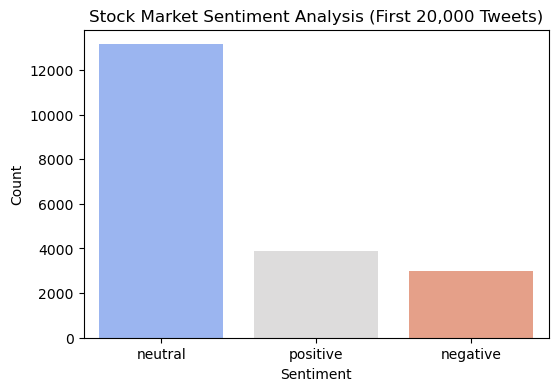

In [ ]:
# Plot the sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_tweets, x='sentiment', palette='coolwarm')

plt.title("Stock Market Sentiment Analysis (First 20,000 Tweets)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

**Expected Insights:**
- If **positive tweets dominates**, it may indicate **bullis**h** market sentiment. 
- If **positive tweets dominates**, it may suggest a **bearish** trend. 
- A **neutral balance** indicates mixed sentiment, suggesting uncertainty. 

## **Stock Prices vs. Public Sentiment**
Now, we compare sentiment trends with stock price movements. 

[*********************100%***********************]  1 of 1 completed


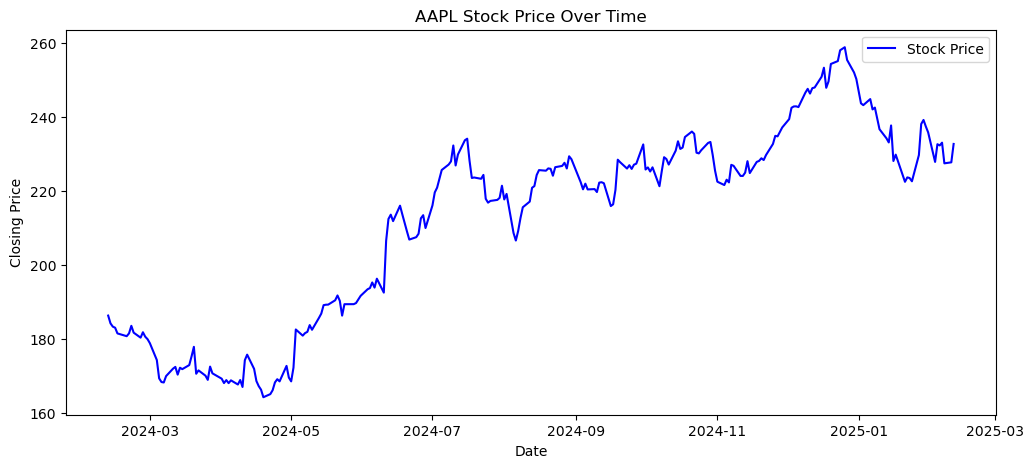

In [ ]:
stock_symbol = "AAPL"
stock_data = yf.download(stock_symbol, period="1y")

plt.figure(figsize=(12,5))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', color='blue')
plt.title(f"{stock_symbol} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

In [ ]:
# Load FinBERT model (already in your code)
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

# Function to compute weighted sentiment score
def compute_sentiment_score(result):
    label = result['label']
    confidence = result['score']
    if label == 'positive':
        return 1 * confidence
    elif label == 'negative':
        return -1 * confidence
    else:  # neutral
        return 0

# Batch process tweets and compute scores
num_tweets = 20000
batch_size = 1000

# Convert dataset to DataFrame (first 20,000 tweets)
df_tweets = pd.DataFrame(dataset['train'][:num_tweets])
df_tweets['cleaned_text'] = df_tweets['text'].apply(clean_text)

# Initialize lists for sentiments and scores
sentiments = []
sentiment_scores = []

# Process tweets in batches
for i in range(0, num_tweets, batch_size):
    batch_texts = df_tweets['cleaned_text'][i:i + batch_size].to_list()
    batch_results = sentiment_pipeline(batch_texts)  # Get sentiment predictions
    
    # Extract labels and compute scores
    batch_sentiments = [result['label'] for result in batch_results]
    batch_scores = [compute_sentiment_score(result) for result in batch_results]
    
    sentiments.extend(batch_sentiments)
    sentiment_scores.extend(batch_scores)

# Add results to DataFrame
df_tweets['sentiment'] = sentiments
df_tweets['sentiment_score'] = sentiment_scores

# Display first few rows
display(df_tweets.head(10))

NameError: name 'pipeline' is not defined

## Conclusion 
This project demonstrates how **NLP can be used to analyze stock market sentiment**. By leveraging **Hugging Face's FinBERT**, I:
- Successfully **classified finantial tweets**, into positive, negative, and neutral. 
- Visualized **how sentiment is distributed**.